<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker. With questions by Pauline van Leeuwen and Tom Pak*

## Notebook 8: Basics of Pandas for data analysis
In this Notebook we learn how to do some basic data analysis with `pandas`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading real data with Pandas
Real data is often stored in CSV files (Comma Separated Values, although the values can be separated by other things than commas).
So far, we have loaded csv files with the `np.loadtxt` command en `np.genfromtxt`
The `loadtxt` function has some basic functionality and works just fine, but when we have more elaborate data sets we want more sophisticated functionality. 
The most powerful and advanced package for data handling and analysis is called `pandas`. We will use only a few functions of the `pandas` package here. Full information on `pandas` can be found on the [pandas website](http://pandas.pydata.org/).

Consider the following dataset, which is stored in the file `transport.csv`. It shows the percentage of transportation kilometers by car, bus or rail for four countries. The dataset has four columns. 

`country, car, bus, rail`  
`some more explanations, yada yada yada`  
`France, 86.1, 5.3, 8.6`  
`Germany, 85.2, 7.1, 7.7`  
`Netherlands, 86.4, 4.6, 9`  
`United Kingdom, 88.2, 6.5, 5.3` 

This data file can be loaded with the `read_csv` function of the `pandas` package. The `read_csv` function has many options. We will use three of them here. The rows that need to be skipped are defined with the `skiprows` keyword (in this case row 1 with the `yada yada` text). The `skipinitialspace` keyword is set to `True` so that the column name ' car' is loaded without the initial space that is in the data file. And the `index_col` keyword is set to indicate that the names in column 0 can be used as an index to select a row.

In [2]:
from pandas import read_csv
tran = read_csv('transport.csv', skiprows=[1], skipinitialspace=True, index_col=0)

`pandas` loads data into a `DataFrame`. A `DataFrame` is like an array, but has many additional features for data analysis. For starters, once you have loaded the data, you can print it to the screen

In [3]:
print(tran)

                 car  bus  rail
country                        
France          86.1  5.3   8.6
Germany         85.2  7.1   7.7
Netherlands     86.4  4.6   9.0
United Kingdom  88.2  6.5   5.3


When the DataFrame is large, you can still print it to the screen (`pandas` is smart enough not to show the entire DataFrame when it is very large), or you can simply print the first 5 lines of the DataFrame with the `.head()` function. 

Another nice option is that you can use the `display` function of the `IPython.display` package to display the DataFrame to the screen. You just have to import the `display` function so you can use it in the Notebook.

In [4]:
from IPython.display import display
display(tran)

,car,bus,rail
country,,,
France,86.1,5.3,8.6
Germany,85.2,7.1,7.7
Netherlands,86.4,4.6,9.0
United Kingdom,88.2,6.5,5.3


### Basic DataFrame manipulation
The rows and columns of a DataFrame may have names (as you can see for the `tran` `DataFrame` above, when we printed it to the screen. To find out which names are used for the columns, use the `keys` function, which is accessible with the dot syntax. You can loop through the names of the columns if you wish.

In [5]:
print('Names of columns:')
print(tran.keys())
for key in tran.keys():
    print(key)

Names of columns:
Index(['car', 'bus', 'rail'], dtype='object')
car
bus
rail


Each DataFrame may be indexed just like an array, by specifying the row and column number using the `.iloc` syntax (which stands for *index location*), where column 0 is the column labeled `car` (since the column labeled as `country` was stored as an index when reading the csv file; more on that later).

In [6]:
print(tran.iloc[0, 1])  # gives the bus data for France
print(tran.iloc[1, 0])  # gives the car data for Germany
print(tran.iloc[2, 2])  # gives the rail data for Netherlands
print(tran.iloc[3])     # all data for United Kindom
print(tran.iloc[:, 1])  # all data for bus

5.3
85.2
9.0
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64
country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64


Alternatively, values in a DataFrame may be selected by specifying the indices by name, using the `.loc` syntax. This is a bit more typing but *much* more explicit. The equivalent of the code cell above, but using indices by name is

In [7]:
print(tran.loc['France', 'bus'])
print(tran.loc['Germany', 'car'])
print(tran.loc['Netherlands', 'rail'])
print(tran.loc['United Kingdom'])
print(tran.loc[:, 'bus'])

5.3
85.2
9.0
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64
country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64


There are two alternative ways to access all the data in a column. First, you can simply specify the column name as an index, without having to use the `.loc` syntax. Second, the dot syntax may be used, like syntax `.column_name`, where `column_name` is the name of the column. Hence, the following three are equivalent

In [8]:
print(tran.loc[:,'car'])  # all rows of 'car' column
print(tran['car'])        # 'car' column 
print(tran.car)

country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64
country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64
country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64


### `numpy` functions for DataFrames
`DataFrame`s can be pretty much treated as arrays, especially when they contain data. Most `numpy` functions work on `DataFrame`s, but they can also be accessed with the *dot* syntax, like `dataframe_name.function()`. Simply type 

`tran.` 

in a code cell and then hit the [tab] key to see all the functions that are available (there are many). In the code cell below, we compute the maximum value of transportation by car, the country corresponding to the maximum value of transportation by car, and the mean value of all transportation by car. You can also find all values larger than a specified value, just like for arrays:

In [9]:
print('maximum car travel percentage:', tran.car.max())
print('country with maximum car travel percentage:', tran.car.argmax())
print('mean car travel percentage:', tran.car.mean())
print('all rail travel above 8 percent:')
print(tran.rail[tran.rail > 8])
print('all countries with rail travel above 8 percent:')
print(tran.index[tran.rail > 8].values)

maximum car travel percentage: 88.2
country with maximum car travel percentage: United Kingdom
mean car travel percentage: 86.47500000000001
all rail travel above 8 percent:
country
France         8.6
Netherlands    9.0
Name: rail, dtype: float64
all countries with rail travel above 8 percent:
['France' 'Netherlands']


### Exercise 1, Country data
The file `countries.csv` contains an assortment data for (almost) every country in the world. Open the data file in an editor to see what it is in it (Notepad, Textedit, even Word if you have to; note that in Excel line numbers start at 1 and not at 0). Load the data with the `read_csv` function of `pandas`, making sure that the names of the countries can be used to select a row, and perform the following tasks:

* Print the first 5 lines of the DataFrame to the screen with the `.head()` function.
* Print the total population for South Korea.
* Print the number of kilometers of coastline in Chile (the coastline is given in km).
* Print all countries with an area above 5 million km$^2$ (use `.values` as shown in example above).
* Print the country with the longest coastline.
* Print the number of countries that use the Euro for their currency.
* Print the number of countries with no coast.

In [10]:
cou = read_csv('countries.csv', skiprows=[0,1,2,3], skipinitialspace=True, index_col=0, delimiter=';')
display(cou.head())

,Continent,Population,Area,Coastline,Currency,DialingPrefix,Birthrate,Deathrate,LifeExpectancy
Country,,,,,,,,,
Afghanistan,Asia,32564342,652230,0,Afghani,93,38.6,13.9,50.9
Egypt,Africa,88487396,1001450,2450,Pfund,20,22.9,4.8,73.7
Albania,Europe,3029278,28748,362,Lek,355,12.9,6.6,78.1
Algeria,Africa,39542166,2381741,998,Dinar,213,23.7,4.3,76.6
American Samoa,Oceania,54343,199,116,Dollar,1-684,22.9,4.8,75.1


In [11]:
print('The population of South Korea is:', cou.loc['South Korea', 'Population'])

The population of South Korea is: 49115196


In [12]:
print('The length of the coastline of Chile is:', cou.loc['Chile', 'Coastline'], 'km')

The length of the coastline of Chile is: 6435 km


In [13]:
print('The countries with an area larger than 5 milion km2 are:')
print(cou.index[cou.Area > 5e6].values)

The countries with an area larger than 5 milion km2 are:
['Antarctica' 'Australia' 'Brazil' 'China' 'Canada' 'Russia'
 'United States']


In [14]:
print('the country with the largest coastline is:')
print(cou.Coastline.argmax())
print('The length of this coastline is:')
print(cou.Coastline.max())

the country with the largest coastline is:
Canada
The length of this coastline is:
202080


In [15]:
print('The Number of countries that uses the Euro is:', len(cou.index[cou.Currency == 'Euro'].values))

The Number of countries that uses the Euro is: 32


In [16]:
print('the number of countries without a coastline is:', len(cou.index[cou.Coastline == 0].values))

the number of countries without a coastline is: 54


### Adding a column to a DataFrame
A column may be added to a DataFrame by simply specifying the name and values of the new column using the syntax `DataFrame['newcolumn']=something`. For example, let's add a column named `public_transport`, which is the sum of the `bus` and `rail` columns, and then find the country with the largest percentage of public transport

In [17]:
tran['public_transport'] = tran.bus + tran.rail
print('Country with largest percentage public transport:', tran.public_transport.argmax())

Country with largest percentage public transport: Germany


### Plotting DataFrames
You can plot the column or row of a DataFrame with `matplotlib` functions, as we have done in previous Notebooks, but `pandas` has also implemented its own, much more convenient, plotting functions (still based on `matplotlib` in the background, of course). The plotting capabilities of `pandas` also use the *dot* syntax, like `dataframe.plot()`. All columns can be plotted simultaneously (note that the names appear on the axes and the legend is added automatically!).

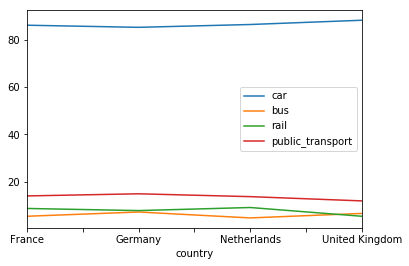

In [18]:
tran.plot();  # plot all columns

You can also plot one column at a time. The style of the plot may be specified with the `kind` keyword (the default is `'line'`). Check out `tran.plot?` for more options. 

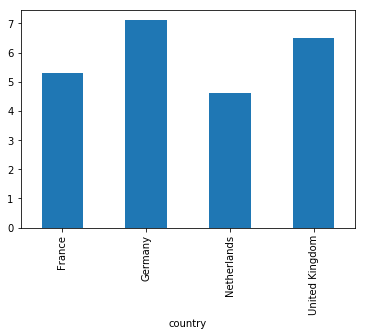

In [19]:
tran['bus'].plot(kind='bar');

### Sorting DataFrames
DataFrames may be sorted with the `.sort_values` function. The keyword `inplace=True` replaces the values in the DataFrame with the new sorted values (when `inplace=False` a new DataFrame is returned, which you can store in a separate variable so that you have two datasets, one sorted and one unsorted). The `sort_values` funcion has several keyword arguments, including `by` which is either the name of one column to sort by or a list of columns so that data is sorted by the first specified column and when values are equal they are sorted by the next column in the list. Another keyword is `ascending`, which you can use to specify whether to sort in ascending order (`ascending=True`, which is the default), or descending order (`ascending=False`)

In [20]:
print('Data sorted by car use:')
display(tran.sort_values(by='car'))
print('Data sorted by bus use:')
display(tran.sort_values(by='bus'))

Data sorted by car use:


,car,bus,rail,public_transport
country,,,,
Germany,85.2,7.1,7.7,14.8
France,86.1,5.3,8.6,13.9
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


Data sorted by bus use:


,car,bus,rail,public_transport
country,,,,
Netherlands,86.4,4.6,9.0,13.6
France,86.1,5.3,8.6,13.9
United Kingdom,88.2,6.5,5.3,11.8
Germany,85.2,7.1,7.7,14.8


### Renaming columns
Sometimes (quite often, really), the name of columns in a dataset are not very convenient (long, including spaces, etc.). For the example of the transportation data, the columns have convenient names, but let's change them for demonstration purposes. You can rename columns inplace, and you can change as many columns as you want. The old and new names are specified with a Python dictionary. A dictionary is a very useful data type. It is specified between braces `{}`, and links a word in the dictionary to a value. The value can be anything. You can then use the word in the dictionary as the index, just like you would look up a word in an paper dictionary.

In [21]:
firstdictionary = {'goals': 20, 'city': 'Delft'}
print(firstdictionary['goals'])
print(firstdictionary['city'])

20
Delft


Much more on Python dictionaries can be found, for example, [here](http://learnpythonthehardway.org/book/ex39.html). Let's continue with renaming two of the columns of the `tran` DataFrame:

In [22]:
tran.rename(columns={'bus': 'BUS', 
                     'rail': 'train'}, inplace=True)
display(tran)

,car,BUS,train,public_transport
country,,,,
France,86.1,5.3,8.6,13.9
Germany,85.2,7.1,7.7,14.8
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


The index column, with the countries, is now called `'country'`, but we can rename that too, for example to `'somewhere in Europe'`, with the following syntax

In [23]:
tran.index.names = ['somewhere in Europe']
display(tran)

,car,BUS,train,public_transport
somewhere in Europe,,,,
France,86.1,5.3,8.6,13.9
Germany,85.2,7.1,7.7,14.8
Netherlands,86.4,4.6,9.0,13.6
United Kingdom,88.2,6.5,5.3,11.8


### Exercise 2, Adding columns to a DataFrame
The Rate of National Increase ($RNI$) describes the increase of a country's population in percent, excluding immigration and emigration. The $RNI$ is defined as

$RNI = \frac{\text{birthrate} - \text{deathrate}}{10} $ (%)

where birthrate and deathrate are expressed per 1000 inhabitants (which they are in the data of Exercise 1), so in essence the $RNI$ is the increase per 100 inhabitants. Continue with the DataFrame of the previous execise and perform the following tasks:

* Add a new column with the rate of national increase $RNI$.
* Print the $RNI$ of the Netherlands. 
* Print the countries with the largest and smallest $RNI$.
* Sort the DataFrame on RNI from high to low and plot the 20 countries with the highest $RNI$ in a bar chart. Label the vertical-axis and add a title.

In [24]:
cou['RNI'] = (cou.Birthrate-cou.Deathrate)/10

In [25]:
print('The RNI of the Netherlands is:', cou.loc['Netherlands', 'RNI'])

The RNI of the Netherlands is: 0.21


In [26]:
print('The country with the largest RNI is', cou.RNI.argmax(), 'The RNI is:', cou.RNI.max())
print('The country with the largest RNI is', cou.RNI.argmin(), 'The RNI is:', cou.RNI.min())

The country with the largest RNI is Mayotte The RNI is: 3.93
The country with the largest RNI is Curacao The RNI is: -0.8


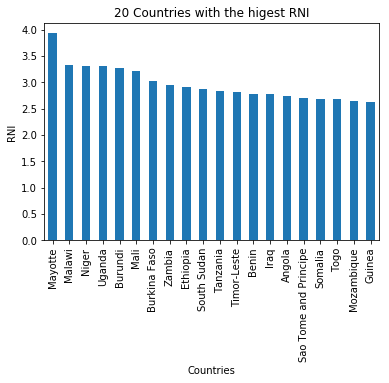

In [27]:
cou2 = cou.sort_values(by='RNI', ascending=False).head(20);
cou2['RNI'].plot(kind='bar', title='20 Countries with the higest RNI', )
plt.ylabel('RNI')
plt.xlabel('Countries');

### Time series data
In time series data, one of the columns represents dates, sometimes including times, together referred to as datetimes. `pandas` can be used to read csv files where one of the columns includes datetime data. You need to tell `pandas` which column contains datetime values and `pandas` will try to convert that column to datetime objects. Datetime objects are very convenient as specifics of the datetime object may be assessed with the dot syntax: `.year` returns the year, `.month` returns the month, etc.

For example, consider the following data stored in the file `timeseries1.dat`

`date, conc`  
`2014-04-01, 0.19`   
`2014-04-02, 0.23`   
`2014-04-03, 0.32`   
`2014-04-04, 0.29`   

The file may be read with `read_csv` using the keyword `parse_dates=[0]` so that column number 0 is converted to datetimes

In [28]:
data = read_csv('timeseries1.dat', parse_dates=[0], skipinitialspace=True)
print(data)

        date  conc
0 2014-04-01  0.19
1 2014-04-02  0.23
2 2014-04-03  0.32
3 2014-04-04  0.29
4 2014-04-05  0.32


The rows of the DataFrame `data` are numbered, as we have not told `pandas` what column to use as the index of the rows. The first column of the DataFrame `data` has datetime values. We can access, for example, the year, month, or day with the dot syntax

In [29]:
print('datetime of row 0:', data.iloc[0, 0])
print('year  of row 0:', data.iloc[0, 0].year)
print('month of row 0:', data.iloc[0, 0].month)
print('day   of row 0:', data.iloc[0, 0].day)

datetime of row 0: 2014-04-01 00:00:00
year  of row 0: 2014
month of row 0: 4
day   of row 0: 1


Time series data may also contain the time in addition to the date. For example, the data of the file `timeseries2.dat`, shown below, contains the day and time. You can access the `hour` or `minutes`, but also the time of a row of the DataFrame with the `.time()` function.

`date, conc`   
`2014-04-01 12:00:00, 0.19`   
`2014-04-01 13:00:00, 0.20`  
`2014-04-01 14:00:00, 0.23`  
`2014-04-01 15:00:00, 0.21` 

In [30]:
data = read_csv('timeseries2.dat', parse_dates=[0], skipinitialspace=True)
print(data)
print('hour  of row 0:', data.iloc[0, 0].hour)
print('minute  of row 0:', data.iloc[0, 0].minute)
print('time of row 0:', data.iloc[0, 0].time())

                 date  conc
0 2014-04-01 12:00:00  0.19
1 2014-04-01 13:00:00  0.20
2 2014-04-01 14:00:00  0.23
3 2014-04-01 15:00:00  0.21
hour  of row 0: 12
minute  of row 0: 0
time of row 0: 12:00:00


### Setting values based on a condition
Values of a column may be changed based on a condition. For example, all values of the concentration above 0.2 may be set to 0.2 with the following syntax

In [31]:
data.loc[data.conc > 0.2, 'conc'] = 0.2
print(data)

                 date  conc
0 2014-04-01 12:00:00  0.19
1 2014-04-01 13:00:00  0.20
2 2014-04-01 14:00:00  0.20
3 2014-04-01 15:00:00  0.20


### Exercise 3, Dominant wave heights
The file `PR1_waves_triaxys_historical.csv` contains the wave height, period, and direction of waves over a timespan of 6 years. Perform the following tasks:

* Load the data with `read_csv` (you probably need to open the file in an editor first, to find out what is in it).
* Plot the maximum wave height vs. the number of the measurement (so not the date). Label the axes.
* Determine the highest maximum wave height during the period of record, and print the highest wave height and the time and date that this occured to the screen.

The highest wave is: 6.55 meters
The time and date of this wave is: 2012-08-24 02:00:00


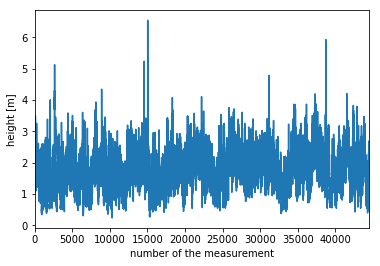

In [32]:
wav = read_csv('PR1_waves_triaxys_historical.csv', parse_dates=[0])
wav['max_wave_height'].plot();
plt.ylabel('height [m]')
plt.xlabel('number of the measurement');

print('The highest wave is:', wav.max_wave_height.max(), 'meters')
print('The time and date of this wave is:', wav.Time[wav.max_wave_height.argmax()])

### Exercise 4, Mean of time series for one year
Use the file `PR1_waves_triaxys_historical.csv` from the previous exercise.

Compute the mean maximum wave height for each year. Later on in this Notebook we learn convenient functions from `pandas` to do this, but here we are going to do this with a double loop. The outer loop loops through all the years of record. In the inner loop, loop through all the data and add all the maximum wave heights for the year under consideration while keeping track of the number of values for that year. When you are done looping through all the data, compute and print the year and the mean value for that year, then go to the next year.

In [33]:
for i in range(2010, 2017):
    print('In the Year',i)
    z = 0
    tot = 0
    for j in range(len(wav)):
        if wav.iloc[j, 0].year == i:
            z += 1
            tot += wav.max_wave_height[j]
            y = tot/z
        elif wav.iloc[j, 0].year < i:
            None
        else:
            break
    print('the average wave height was:',y)
    print('')

In the Year 2010
the average wave height was: 1.460196793

In the Year 2011
the average wave height was: 1.55610523815

In the Year 2012
the average wave height was: 1.60865292341

In the Year 2013
the average wave height was: 1.7412765699

In the Year 2014


AttributeError: 'Timestamp' object has no attribute 'ndim'

### Date times as index
The datetime of a dataset may also be used as the index of a DataFrame by specifying the column with the dates as the column to use for an index with the `index_col` keyword.  Note that datetimes are given as year-month-day, so `2012-04-01` means April 1, 2012.

In [34]:
data = read_csv('timeseries1.dat', parse_dates=[0], index_col=0)
print(data)
print('data on April 1:', data.loc['2014-04-01'])
print('data on April 2:', data.loc['2014-04-02'])

             conc
date             
2014-04-01   0.19
2014-04-02   0.23
2014-04-03   0.32
2014-04-04   0.29
2014-04-05   0.32
data on April 1:  conc    0.19
Name: 2014-04-01 00:00:00, dtype: float64
data on April 2:  conc    0.23
Name: 2014-04-02 00:00:00, dtype: float64


### Resampling
DataFrames have a very powerful feature called resampling. Downsampling refers to going from high frequency to low frequency. For example, going from daily data to monthly data. Upsampling refers to going from low frequency to high frequency. For example going from monthly data to daily data. For both upsampling and downsampling, you need to tell `pandas` how to perform the resampling. Here we discuss downsampling, where we compute monthly totals from daily values. First we load the daily rainfall in Rotterdam in 2012 from the file `rotterdam_rainfall_2012.txt` and specify the dates as the index (this is the column labeled as `YYYYMMDD`). We resample the rain to monthly totals using the `resample` function. You have to tell the `resample` function to what frequency it needs to resample. Common ones are `'A'` for yearly, `'M'` for monthly, `'W'` for weekly, `'D'` for daily, and `'H'` for hourly, but there are many other ones (see  [here](http://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html)). The keyword argument `kind` is used to tell `pandas` where to assign the computed value to. You can assign the computed value to the last day of the period, or the first day, or to the entire period (in this case the entire month). The latter is done by specifying `kind='period'`, which is what we will do here.  Finally, you need to specify how to resample. This is done by adding a `numpy` function at the end of the resample statement, like

    dataframe.resample(...).npfunc()
    
where `npfunc` can be any `numpy` function like `mean` for the mean (that is the default), `sum` for the total, `min`, `max`, etc. Calculating the monthly totals and making a bar graph can now be done with `pandas` as follows. 

YYYYMMDD
2012-01     83.0
2012-02     24.3
2012-03     21.9
2012-04     57.6
2012-05     76.5
2012-06    119.0
2012-07    121.6
2012-08     93.4
2012-09     52.0
2012-10    132.6
2012-11     63.3
2012-12    149.5
Freq: M, Name: RH, dtype: float64


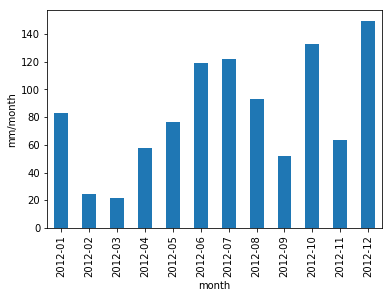

In [35]:
rain = read_csv('rotterdam_rainfall_2012.txt', skiprows=9,
                parse_dates=['YYYYMMDD'], index_col='YYYYMMDD',
                skipinitialspace=True)
rain.RH[rain.RH < 0] = 0  # remove negative values
rain.RH = rain.RH * 0.1 # convert to mm/day
monthlyrain = rain.RH.resample('M', kind='period').sum()
print(monthlyrain)
monthlyrain.plot(kind='bar')
plt.ylabel('mm/month')
plt.xlabel('month');

### Exercise 5, Plot time series
Reload the wave data from Exercise 3 and 4, but now make sure that the date times can be used as an index. Rename the column with `max_wave_height` to `wmax` and print the `head` of the data (the first five lines). Next, plot the maximum wave height vs. time. The horizontal axis should now show dates. Add a label to the vertical axis. Note that there are some periods when data is missing.

In [ ]:
wav2 = read_csv('PR1_waves_triaxys_historical.csv', parse_dates=[0], index_col=0)
wav2.rename(columns={'max_wave_height': 'wmax' }, inplace=True)

display(wav2.head(5))

wav2['wmax'].plot();
plt.ylabel('height [m]')
plt.xlabel('Date');


### Exercise 6, Resample time series
Compute the mean maximum wave height for each year using the `resample` function of `pandas`. 
Print the mean maxiumn wave height for all years to the screen and make sure they are the same as you computed in Exercise 4 (if you did it correctly, also note how much faster it is!). 
Make a bar graph of the mean maximum wave height for each year.

In [ ]:
import pandas as p

wav3 = wav2.wmax.resample('A', kind='period').mean()
display(wav3)
wav3.plot(kind='bar')
plt.ylabel('height [m]')
plt.xlabel('Year');